# Linear regression with multi variable

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!cat data/ex1data2.txt | head -5

2104,3,399900
1600,3,329900
2400,3,369000
1416,2,232000
3000,4,539900


In [3]:
data = np.loadtxt('data/ex1data2.txt', delimiter=',', dtype='long')
X = data[:, :-1]
y = data[:, -1].reshape(-1, 1)

## Normalizing Features

In [4]:
def featureNormalize(X):
    mu = np.mean(X, 0)
    sigma = np.std(X, 0)
    X_norm = (X - mu) / sigma
    return mu, sigma, X_norm

In [5]:
mu, sigma, X_norm = featureNormalize(X)
X_norm = np.insert(X_norm, 0, 1, axis=1)
X_norm[:5]

array([[ 1.        ,  0.13141542, -0.22609337],
       [ 1.        , -0.5096407 , -0.22609337],
       [ 1.        ,  0.5079087 , -0.22609337],
       [ 1.        , -0.74367706, -1.5543919 ],
       [ 1.        ,  1.27107075,  1.10220517]])

## Gradient Descent

In [6]:
def h(theta, X):
    """假设函数h"""
    return np.dot(X, theta)

def computeCost(X, y, theta):
    """代价函数J"""
    m = X.shape[0]
    h_y = h(theta, X) - y
    return (1./(2*m)) * np.sum(np.square(h_y))

def gradientDescent(X, y, theta, alpha, iterations):
    """梯度下降算法"""
    J_history = np.zeros(iterations)
    m = X.shape[0]
    for iter in range(iterations):
        J_history[iter] = computeCost(X, y, theta)
        h_y = h(theta, X) - y
        theta = theta - alpha * (1./m) * np.transpose(np.dot(h_y.T, X))
    return theta, J_history

In [7]:
alpha = 0.01
iterations = 8500
theta = np.zeros([3, 1])

theta, J_history = gradientDescent(X_norm, y, theta, alpha, iterations)
print('Theta computed from gradient descent: \n', theta)

Theta computed from gradient descent: 
 [[ 340412.65957447]
 [ 109447.79646964]
 [  -6578.35485416]]


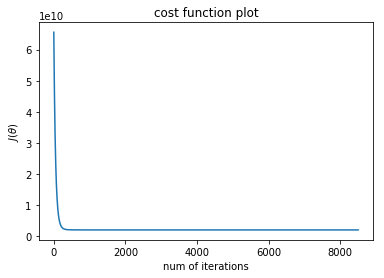

In [8]:
plt.plot(J_history)
plt.title('cost function plot')
plt.xlabel('num of iterations')
plt.ylabel(r'$J(\theta)$')
plt.show()

In [9]:
# Predicted price of a 1650 sq-ft, 3 br house 
predict_x = ([1650, 3] - mu) / sigma
predict_x = np.insert(predict_x, 0, 1)
print('Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): \n', h(theta, predict_x))

Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): 
 [ 293081.46433489]


## Normal Equations

In [10]:
def normalEqn(X, y):
    return np.linalg.pinv(np.dot(X.T, X)).dot(X.T).dot(y)

In [11]:
X = np.insert(X, 0, 1, axis=1)
w = normalEqn(X, y)
print('Theta computed from the normal equations: \n', w);

Theta computed from the normal equations: 
 [[ 89597.90954361]
 [   139.21067402]
 [ -8738.01911255]]


In [12]:
price = h(w, [1, 1650, 3])
print('Predicted price of a 1650 sq-ft, 3 br house (using normal equations): \n', price);

Predicted price of a 1650 sq-ft, 3 br house (using normal equations): 
 [ 293081.46433499]
